In [1]:
import sys
sys.path.append(".")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [2]:
import pyforest 
from DataPrep.load_data import load_data
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error,mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from tqdm import tqdm
register_matplotlib_converters()
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = load_data()

In [11]:
df.index[df["Energy (kWh)"]>0][0]

Timestamp('2014-09-24 00:00:00')

In [22]:
df.index[df["Energy (kWh)"]>0][0]

Timestamp('2014-09-24 00:00:00')

In [4]:
df = df[df["Label"]==1]
[df = dfddf.index[df["Energy (kWh)"]>0][0]:

In [24]:
df

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-24,1,11.250000,13.633333,0.560109,0.000000,66,11,16,15.0,35,...,0,0,0,0,0,0,1,0,0,0
2014-09-25,1,0.000000,0.000000,0.000000,0.000000,66,11,16,15.0,35,...,0,0,0,0,0,0,1,0,0,0
2014-09-26,1,189.766667,224.500000,10.757406,0.000000,66,11,16,15.0,35,...,0,0,0,0,0,0,1,0,0,0
2014-09-27,1,433.933333,471.350000,36.925433,0.000000,66,11,16,15.0,35,...,0,0,0,0,0,0,1,0,0,0
2014-09-28,1,303.566667,354.000000,20.145774,0.000000,66,11,16,15.0,35,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1,1089.986936,1281.509352,95.352860,21.882358,66,11,16,15.0,35,...,0,0,0,0,0,0,0,0,0,1
2019-12-28,1,1114.716667,1131.233333,101.480000,23.000000,66,11,16,15.0,35,...,0,0,0,0,0,0,0,0,0,1
2019-12-29,1,794.600000,798.666667,72.592000,16.710000,66,11,16,15.0,35,...,0,0,0,0,0,0,0,0,0,1


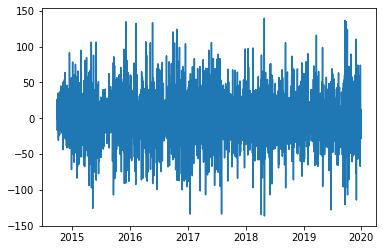

(-14.36967687042387, 9.540807928076997e-27, 19, 1904, {'1%': -3.4337891481553133, '5%': -2.8630591884371612, '10%': -2.5675787580436586}, 18488.688747484135)


In [25]:
plt.plot(df["Energy (kWh)"].diff().dropna())
plt.show()


print(adfuller(df["Energy (kWh)"].diff().dropna()))

<IPython.core.display.Javascript object>

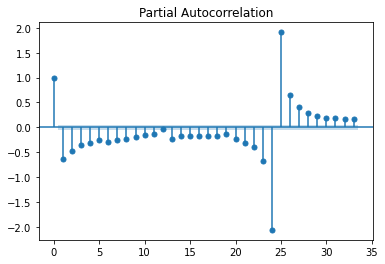

<IPython.core.display.Javascript object>

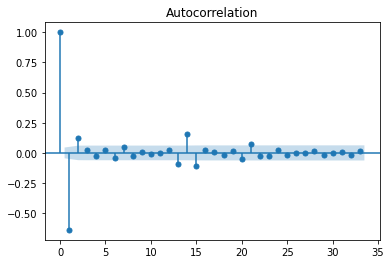

In [26]:
plot_pacf(np.sqrt(df["Energy (kWh)"]).diff().diff().dropna())
plt.show()
plot_acf(np.sqrt(df["Energy (kWh)"]).diff().diff().dropna())
plt.show()

In [5]:
df = df.drop(columns=["Charging Time (mins)","Parking Time (mins)"])

In [82]:
mod = pd.read_csv("data\createdDat\ARIMAPred\ArimaModels.csv")

<IPython.core.display.Javascript object>

In [83]:
#for i in range(7):
#    print(mod[mod["AIC"]==min(mod["AIC"][mod["Label"]==i])])

     Unnamed: 0  Label   ar    d   ma           AIC
228         228    0.0  7.0  1.0  8.0  27884.502421
     Unnamed: 0  Label   ar    d   ma           AIC
587         587    1.0  9.0  1.0  7.0  28489.224685
     Unnamed: 0  Label   ar    d   ma           AIC
889         889    2.0  9.0  1.0  9.0  28114.503073
      Unnamed: 0  Label   ar    d   ma          AIC
1128        1128    3.0  7.0  1.0  8.0  30763.69774
      Unnamed: 0  Label   ar    d   ma           AIC
1459        1459    4.0  8.0  1.0  9.0  30045.479701
      Unnamed: 0  Label   ar    d   ma           AIC
1729        1729    5.0  7.0  1.0  9.0  30385.818548
      Unnamed: 0  Label   ar    d   ma           AIC
2028        2028    6.0  7.0  1.0  8.0  28925.352641


In [7]:
int((len(df["Energy (kWh)"].index))*0.01)

30

In [6]:
pm.auto_arima(df["Energy (kWh)"], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18787.520, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19664.283, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19265.536, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18798.488, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19662.286, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18786.464, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18784.464, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=18786.463, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18784.718, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18788.450, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=18782.581, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18796.584, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=18784.580, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=18784.580, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [36]:
pred = []
days_pred = []
train = int((len(df["Energy (kWh)"].index))*0.1)
re = len(df["Energy (kWh)"].index)-train
a = df.index[0]#.to_timestamp()
b = df.index[train]#.to_timestamp()
for i in range(50):#re):
    try:
        sam = SARIMAX(df["Energy (kWh)"][:b], order=(9,1,8) ,freq="D")
        sam_fit = sam.fit()

        days = 1
        n = b + pd.Timedelta(days=days)
        y_pred = sam_fit.forecast()
        #n1 = n + pd.Timedelta(days=1)
        #y_pred = sam_fit.forecast(steps = days)
        #y_pred = sam_fit.predict(start=n,end=n,typ="levels")
        #y_pred.index=y_pred.index.to_timestamp()
        
        pred.append(float(y_pred))

        a = a + pd.Timedelta(days=days)
        b = b + pd.Timedelta(days=days)
        days_pred.append(n)
    except np.linalg.LinAlgError:
        days = 1
        n = b + pd.Timedelta(days=days)
        pred.append(y_pred[-1])

        a = a + pd.Timedelta(days=days)
        b = b + pd.Timedelta(days=days)
        days_pred.append(n)
    print(f"Ireration {i}:{re}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 0:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 1:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 2:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 3:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 4:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 5:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 6:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 7:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 8:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 9:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 10:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 11:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 12:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 13:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 14:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 15:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 16:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 17:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 18:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 19:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 20:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 21:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 22:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 23:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 24:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 25:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 26:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 27:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 28:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 29:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 30:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 31:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 32:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 33:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 34:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 35:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 36:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 37:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 38:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 39:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 40:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 41:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 42:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 43:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 44:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 45:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 46:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 47:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 48:1733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ireration 49:1733


In [37]:
sam_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Energy (kWh)   No. Observations:                  242
Model:               SARIMAX(9, 1, 8)   Log Likelihood               -1146.638
Date:                Wed, 28 Apr 2021   AIC                           2329.276
Time:                        14:36:07   BIC                           2392.003
Sample:                    09-24-2014   HQIC                          2354.548
                         - 05-23-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4190      4.958     -0.085      0.933     -10.136       9.298
ar.L2          0.4013      3.382      0.119      0.906      -6.227       7.029
ar.L3          0.1014      1.343      0.075      0.940      -2.532       2.734
ar.L4         -0.3929      0.194     -2.023      0.043      -0.774      -0.012
ar.L5         -0.7798      1.905     -0.409      0.682      -4.514       2.954
ar.L6          0.2071      2.743      0.075      0.940      -5.168       5.583
ar.L7          0.2699      3.753      0.072      0.943      -7.087       7.626
ar.L8         -0.0049      0.784     -0.006      0.995      -1.542       1.532
ar.L9          0.0793      0.566      0.140      0.889      -1.031       1.190
ma.L1         -0.3287      4.962     -0.066      0.947     -10.055       9.397
ma.L2         -0.9139      6.154     -0.149      0.882     -12.976      11.148
ma.L3          0.0881      1.394      0.063      0.950      -2.645       2.821
ma.L4          0.7501      1.592      0.471      0.638      -2.371       3.871
ma.L5          0.6080      3.046      0.200      0.842      -5.363       6.579
ma.L6         -1.0113      1.832     -0.552      0.581      -4.603       2.580
ma.L7         -0.3188      5.874     -0.054      0.957     -11.832      11.195
ma.L8          0.3577      3.480      0.103      0.918      -6.462       7.177
sigma2       845.1551    117.460      7.195      0.000     614.938    1075.372
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                14.81
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
pred = pd.DataFrame(pred)
pred.index = days_pred  

<IPython.core.display.Javascript object>

r^2 score -0.06829769198484859


<IPython.core.display.Javascript object>

RMSE 39.05262557993635


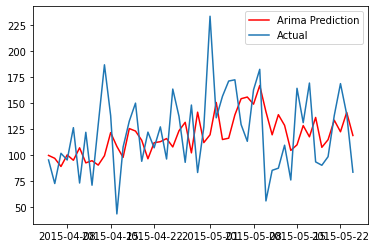

In [40]:
plt.plot(pred, color="red", label="Arima Prediction")
plt.plot(df["Energy (kWh)"][days_pred[0]:days_pred[-1]],label="Actual")
plt.legend()
print(f'r^2 score {r2_score(df["Energy (kWh)"][days_pred[0]:days_pred[-1]],pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(df["Energy (kWh)"][days_pred[0]:days_pred[-1]],pred))}')
plt.show()

In [57]:
df0 = pd.read_csv("data\createdDat\AlmostClean.csv")
df0 = df0[df0["Label"]==0]
label0 = pd.read_csv("data\createdDat\ARIMAPred\ARIMA_Prediction_Label0.csv")
label0 = label0.set_index("Unnamed: 0")
label0.index = pd.to_datetime(label0.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
print(f'MAE = {mean_absolute_error(df0["Energy (kWh)"][-len(label0)+1:],label0[:-1])}')
print(f'MAPE = {mean_absolute_percentage_error(df0["Energy (kWh)"][-len(label0)+1:],label0[:-1])}')
print(f'r^2 = {r2_score(df0["Energy (kWh)"][-len(label0)+1:],label0[:-1])}')
print(f'MSE = {mean_squared_error(df0["Energy (kWh)"][-len(label0)+1:],label0[:-1])}')
print(f'RMSE = {np.sqrt(mean_squared_error(df0["Energy (kWh)"][-len(label0)+1:],label0[:-1]))}')

MAE = 18.61740090479644
MAPE = 0.25696662584643126
r^2 = 0.5138784726780359
MSE = 578.0294362766066


<IPython.core.display.Javascript object>

RMSE = 24.04224274639549


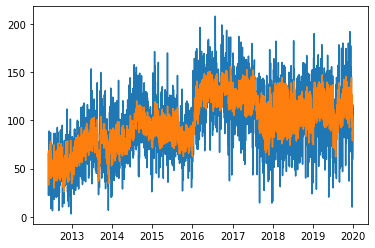

In [81]:
plt.plot(label0.index[:-1],df0["Energy (kWh)"][-len(label0)+1:])
plt.plot(label0.index[:-1],label0[:-1])
plt.show()